# Exploratory data analysis (EDA) of supermarkets

## Preparation

### Import dependencies

In [24]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


### Import data

In [25]:
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[[
    "id", 
    "lat", "lon", 
    "brand", 
    "shop", 
    "addr:city", 
    "addr:housenumber", 
    "addr:postcode", 
    "geometry", 
    "index_right", 
    "bfs_name", 
    "bfs_number", 
    "pop", 
    "pop_dens", 
    "frg_pct", 
    "emp"
]]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


## Analysis

### Count supermarkets by brand

In [26]:
df_orig['brand'].value_counts()

brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64

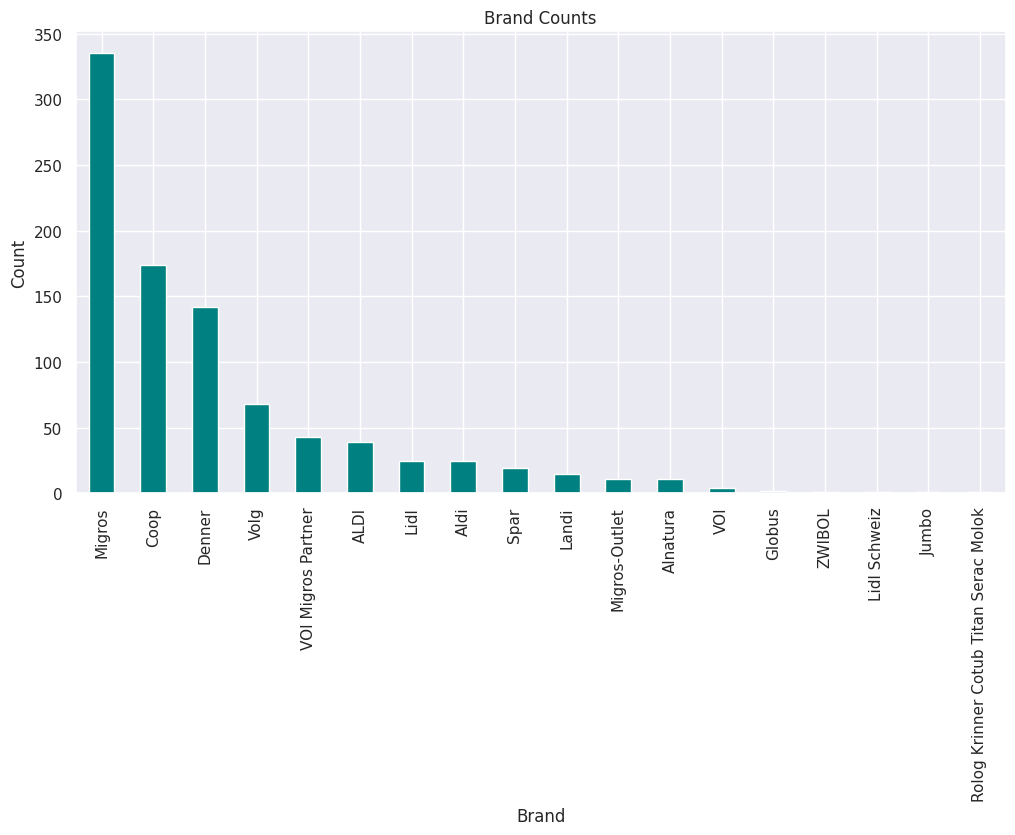

In [27]:
brand_counts = df_orig['brand'].value_counts()

plt.figure(figsize=(12, 6)) 
brand_counts.plot(kind='bar', color='teal')
plt.title('Brand Counts')
plt.xlabel('Brand')
plt.ylabel('Count')

plt.show()

### Scatter plot

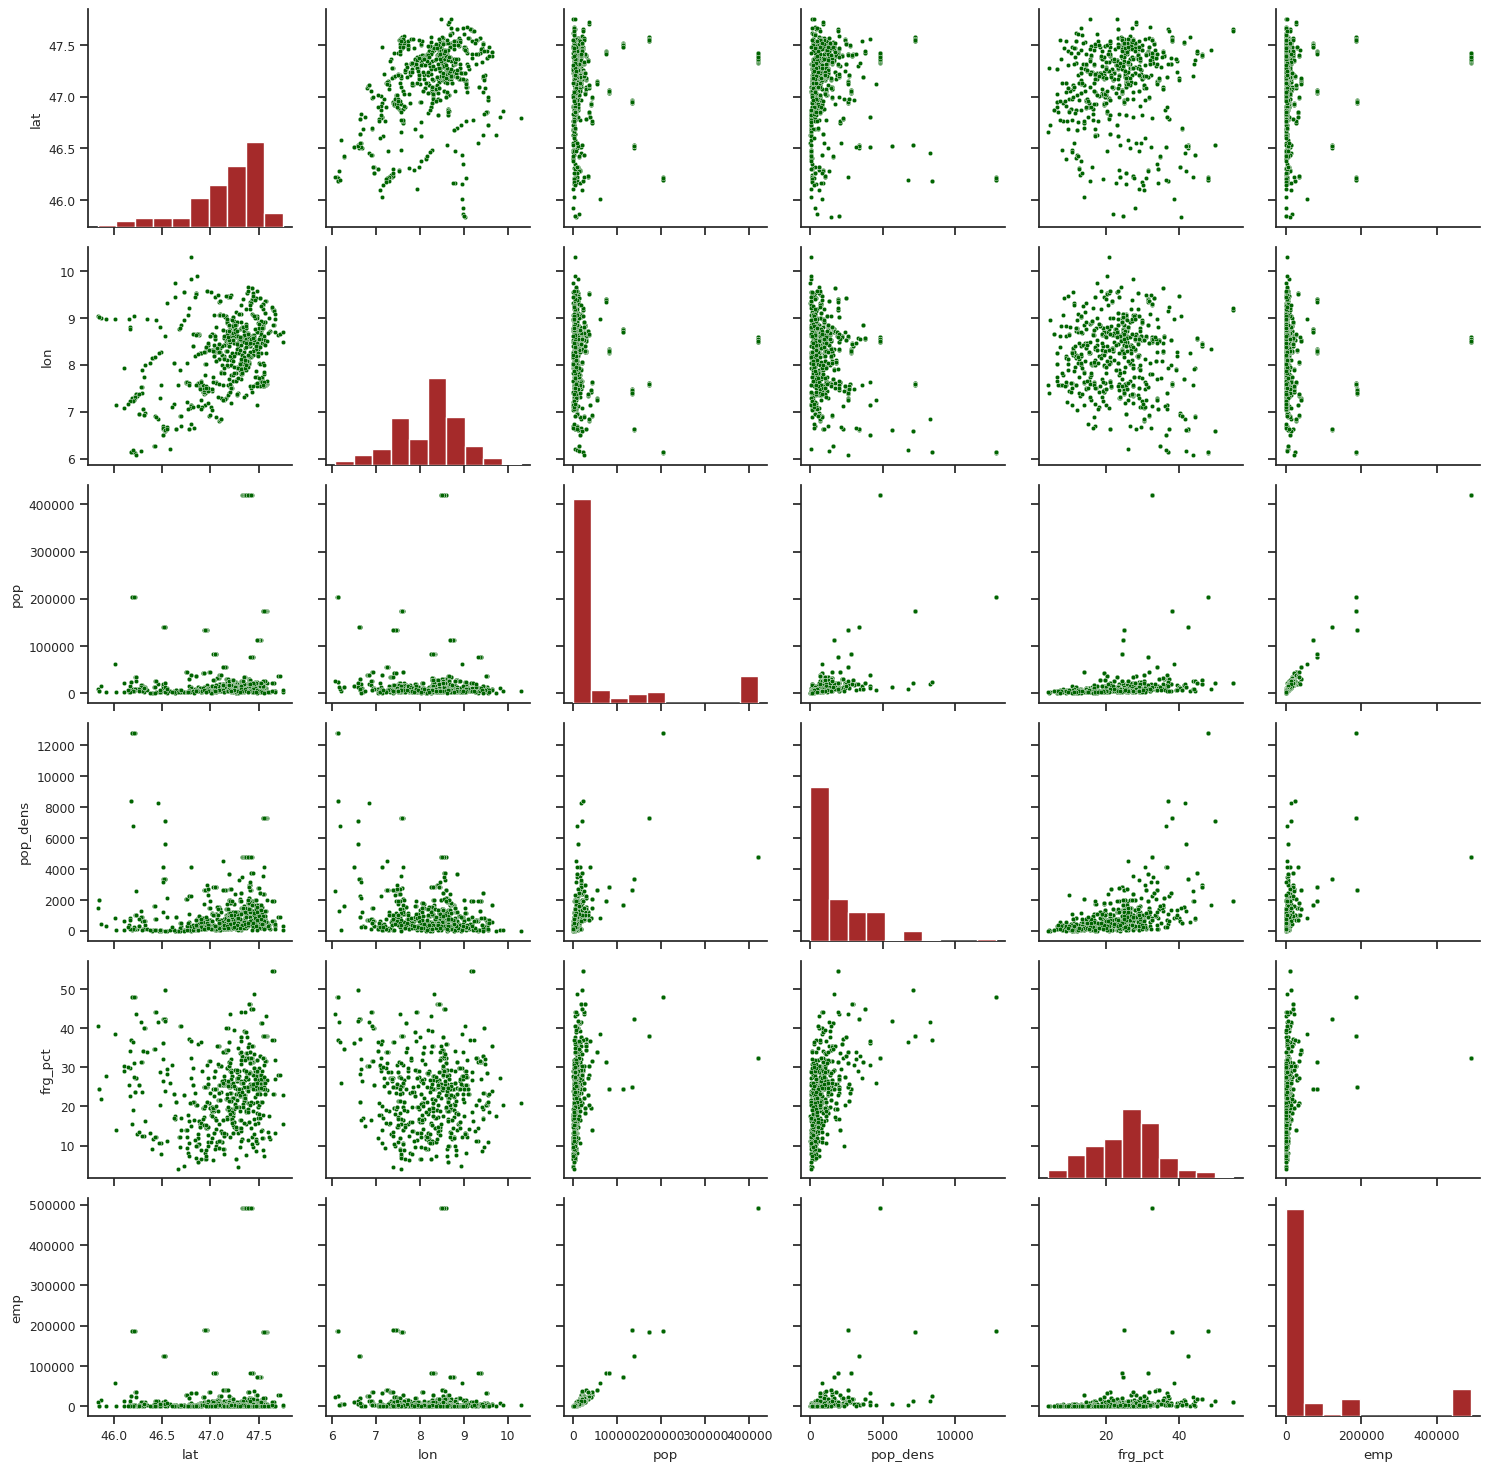

In [28]:
sns.set(style="ticks", font_scale=0.8)

g = sns.PairGrid(df_orig[['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']])
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

plt.show()

### Location

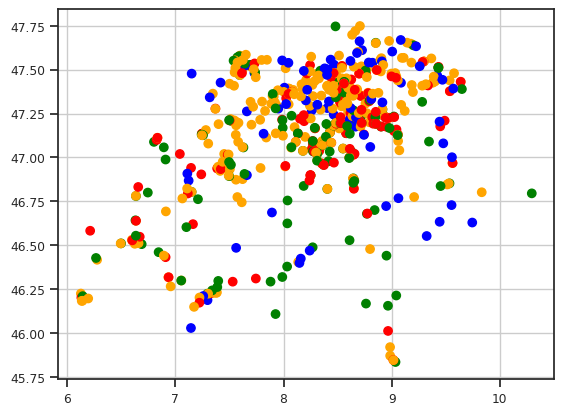

In [29]:
#Subset
df_sub = df_orig.loc[df_orig['brand'].isin(['Coop', 'Migros', 'Denner', 'Volg'])]
df_sub

#Colors
colors = {
    'Coop' : 'green',
    'Migros': 'orange',
    'Denner': 'red',
    'Volg': 'blue'
}

#Plot
plt.grid()
plt.scatter(
    df_sub['lon'],
    df_sub['lat'],
    c=df_sub['brand'].map(colors)
)

In [30]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-10 06:41:27
Python Version: 3.10.13
-----------------------------------
